In [7]:
from pymatgen.ext.matproj import MPRester
from pymatgen.phonon.plotter import PhononBSPlotter
import matplotlib.pyplot as plt
import numpy as np
import math
import matplotlib.image as img

In [8]:
with MPRester("HPRMToUrA4F7voa8") as m:

    # Structure for material id
    pbs = m.get_phonon_bandstructure_by_material_id("mp-961649")

/usr/local/lib64/python3.6/site-packages/pymatgen/phonon/bandstructure.py:455: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray

/usr/local/lib64/python3.6/site-packages/pymatgen/phonon/bandstructure.py:456: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



<module 'matplotlib.pyplot' from '/usr/local/lib64/python3.6/site-packages/matplotlib/pyplot.py'>

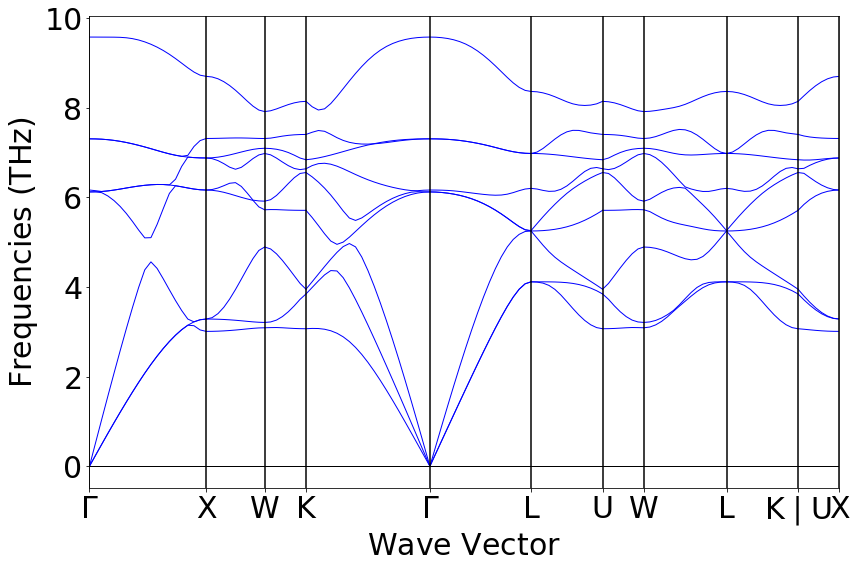

In [9]:
graph = PhononBSPlotter(pbs)
graph.get_plot()

La vitesse du son est donnée par la relation 
<br>
<br>
<center>
    $v_s = \frac{d\omega}{dq}$
</center> 
<br>
avec $\omega$ proche de 0.

Pour déterminer la vitesse du son il suffit donc de considérer la pente de la droite tangente approximant la branche accoustique pour $q$ proche de l'extrémité d'une direction de la zone de Brillouin et $\omega = 2 \pi f$ proche de 0


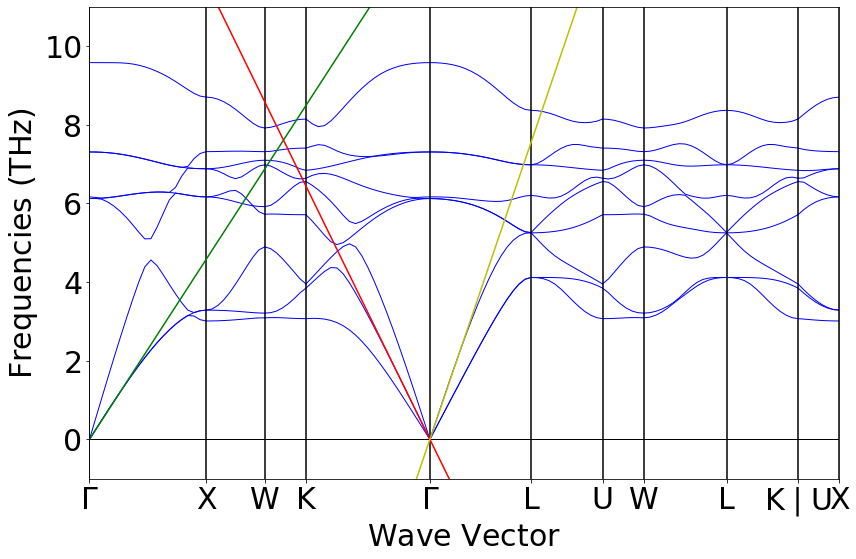

In [10]:
data = graph.bs_plot_data()

d1 = [data.get('distances')[0][0], data.get('distances')[0][5]]
d2 = [data.get('distances')[3][-5], data.get('distances')[4][0]]
d3 = [data.get('distances')[4][0], data.get('distances')[4][5]]


f1 = [data.get('frequency')[0][0][0], data.get('frequency')[0][0][5]]
f2 = [data.get('frequency')[3][1][-5], data.get('frequency')[4][1][0]]
f3 = [data.get('frequency')[4][2][0], data.get('frequency')[4][2][5]]


coef1 = np.polyfit(d1, f1, 1)
coef2 = np.polyfit(d2, f2, 1)
coef3 = np.polyfit(d3, f3, 1)


x = np.linspace(0,data.get('ticks').get('distance')[-1],1000)

y1 =coef1[0]*x+coef1[1]
y2 =coef2[0]*x+coef2[1]
y3 =coef3[0]*x+coef3[1]


graph.get_plot()
plt.plot(x, y1, color='g')
plt.plot(x, y2, color='r')
plt.plot(x, y3, color='y')

plt.ylim(-1, 11)
plt.show()

On peut maintenant obtenir les vitesses du son en prenant la valeur absolue de la pente des tangentes aux bandes accoustiques. 

Il ne faut pas oublier de multiplier la fréquence par $2 \pi$ pour obtenir la fréquence angulaire. De plus, les unités du graph étant des $THz$ pour les fréquences et des Ångström pour les vecteurs d'onde, il faut également multiplier par les facteur $10^{12}$ et $10^{-10}$ pour obtenir une vitesse en $\frac{m}{s}$


In [12]:
print("Vitesse du son de la première bande accoustique dans la zone 1 : ", abs(coef1[0]*2*np.pi*10**2), "[m/s]")
print("Vitesse du son de la deuxième bande accoustique dans la zone 4 : ", abs(coef2[0]*2*np.pi*10**2), "[m/s]")
print("Vitesse du son de la troisième bande accoustique dans la zone 5 : ", abs(coef3[0]*2*np.pi*10**2), "[m/s]")

Vitesse du son de la première bande accoustique dans la zone 1 :  2755.503786630937 [m/s]
Vitesse du son de la deuxième bande accoustique dans la zone 4 :  3651.4875664109277 [m/s]
Vitesse du son de la troisième bande accoustique dans la zone 5 :  5244.497958451799 [m/s]
